<a href="https://colab.research.google.com/github/dharsh70/my-Colab-projects-AI/blob/main/DNN_2101043.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


# from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/ML-developed_course/main/Data/Engine_NOx_classification.csv')
data.head()

,Load [ft.lb],Engine speed [rpm],mf [mg/stroke],Pr [PSI],NOx [ppm],High NOx
0,50,2502.400000,31.222326,15285.16744,103.899724,0
1,50,2248.666667,30.116667,15155.13333,112.610181,0
2,75,2502.000000,38.300000,15356.00000,114.789893,0
3,100,2504.000000,42.900000,15296.00000,125.411970,0
4,75,2262.000000,34.100000,15254.00000,126.524679,0


In [ ]:
cdf = data[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]', 'High NOx']]

msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Text(0, 0.5, 'Engine speed [rpm]')

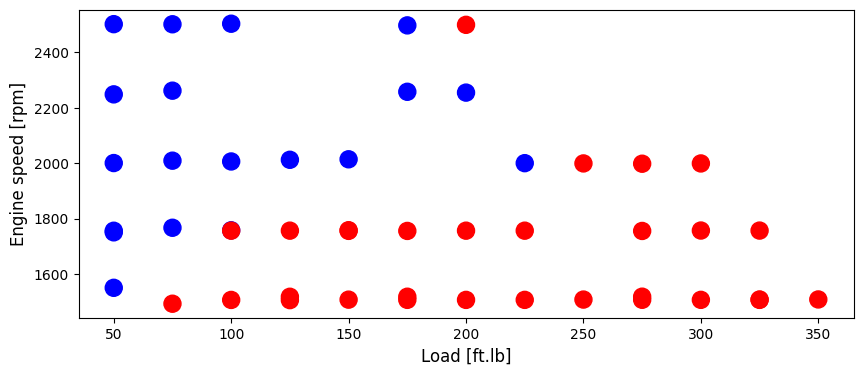

In [ ]:
colors = {0: 'blue', 1:'red', 2:'green', 3:'coral', 4:'orange', 5:'black'}

area = 150
# area = 200
plt.figure(1, figsize=(10, 4))
plt.scatter(train['Load [ft.lb]'], train['Engine speed [rpm]'], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)

plt.xlabel('Load [ft.lb]', fontsize=12)
plt.ylabel('Engine speed [rpm]', fontsize=12)

Text(0, 0.5, 'Engine speed [rpm]')

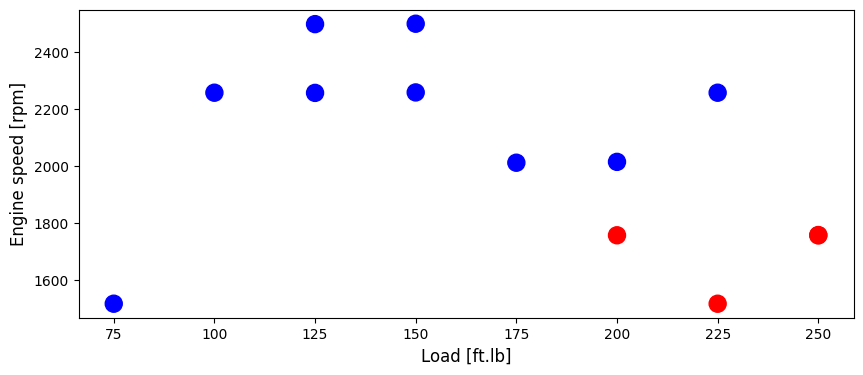

In [ ]:
area = 150
# area = 200
plt.figure(1, figsize=(10, 4))
plt.scatter(test['Load [ft.lb]'], test['Engine speed [rpm]'], s=area, c=np.array(test['High NOx'].map(colors).tolist()), alpha=1)

plt.xlabel('Load [ft.lb]', fontsize=12)
plt.ylabel('Engine speed [rpm]', fontsize=12)

In [ ]:
from sklearn import preprocessing

# train_x = np.asanyarray(train[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]']])
# train_y = np.asanyarray(train[['High NOx']])

# test_x = np.asanyarray(test[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]']])
# test_y = np.asanyarray(test[['High NOx']])

train_x = np.asanyarray(train[['Load [ft.lb]','Engine speed [rpm]']])
train_y = np.asanyarray(train[['High NOx']])

test_x = np.asanyarray(test[['Load [ft.lb]','Engine speed [rpm]']])
test_y = np.asanyarray(test[['High NOx']])


min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train_x)
X_test_minmax = min_max_scaler.transform(test_x)

In [ ]:
X = X_train_minmax.T
Y = train_y.T

shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 49)
The shape of Y is: (1, 49)
I have m = 49 training examples!


In [ ]:
def layer_sizes(X, Y):
    """
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer

    return (n_x, n_h, n_y)

In [ ]:
(n_x, n_h, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    """
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.

    # generate random weight and zero bias
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))


    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [ ]:
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [ ]:
def sigmoid(x):
    """
    Arguments:
    x -- A scalar or numpy array of any size.
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [ ]:
def forward_propagation(X, parameters):
    """
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"


    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]



    # Implement Forward Propagation to calculate A2 (probabilities)

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)


    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [ ]:
A2, cache = forward_propagation(X, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.004345922777615601 -0.004345679900179281 -5.620564590930477e-05 0.49998594858871837


In [ ]:
def compute_cost(A2, Y, parameters):
    """
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function,
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]

    cost -- cross-entropy cost given equation (13)

    """

    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost

    logprobs = Y*np.log(A2) + (1-Y)*np.log(1-A2)
    cost = (-1/m) * np.sum(logprobs, axis=1)


    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect.
                                    # E.g., turns [[17]] into 17
    assert(isinstance(cost, float))

    return cost

In [ ]:
print("cost = " + str(compute_cost(A2, Y, parameters)))

cost = 0.6930843406866327


In [ ]:
def backward_propagation(parameters, cache, X, Y):
    """
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]

    # First, retrieve W1 and W2 from the dictionary "parameters".

    W1 = parameters["W1"]
    W2 = parameters["W2"]


    # Retrieve also A1 and A2 from dictionary "cache".

    A1 = cache["A1"]
    A2 = cache["A2"]


    # Backward propagation: calculate dW1, db1, dW2, db2.

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1-np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)


    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [ ]:
grads = backward_propagation(parameters, cache, X, Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00143934 -0.0006279 ]
 [ 0.00123646 -0.00053944]
 [-0.0007501   0.00032729]
 [-0.00311857  0.00136027]]
db1 = [[ 0.00118763]
 [ 0.00102022]
 [-0.00061888]
 [-0.00257338]]
dW2 = [[ 0.00053361  0.00387959  0.00194023 -0.00142323]]
db2 = [[-0.11225895]]


In [ ]:
def update_parameters(parameters, grads, learning_rate):
    """

    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients

    parameters -- python dictionary containing your updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters"

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]


    # Retrieve each gradient from the dictionary "grads"

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]


    # Update rule for each parameter

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2


    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [ ]:
parameters = update_parameters(parameters, grads, 0.01)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00418197 -0.00055639]
 [-0.02137433  0.0164081 ]
 [-0.01792685 -0.00842075]
 [ 0.00506    -0.01246648]]
b1 = [[-1.18762694e-05]
 [-1.02021563e-05]
 [ 6.18882113e-06]
 [ 2.57338043e-05]]
W2 = [[-0.01058486 -0.00912887  0.00549514  0.02293631]]
b2 = [[0.00112259]]


In [ ]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False, learning_rate = 0.1):
    """

    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations

    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)

        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)

        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)


        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [ ]:
parameters = nn_model(X, Y, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.693084
Cost after iteration 1000: 0.213312
Cost after iteration 2000: 0.187425
Cost after iteration 3000: 0.164655
Cost after iteration 4000: 0.151858
Cost after iteration 5000: 0.144224
Cost after iteration 6000: 0.138559
Cost after iteration 7000: 0.133572
Cost after iteration 8000: 0.128257
Cost after iteration 9000: 0.121529
W1 = [[-5.60449313 -0.08281414]
 [-1.64713654  5.09796215]
 [-0.54731829 -1.22743351]
 [ 2.2654472  -4.32347932]]
b1 = [[ 0.3570452 ]
 [-1.01329293]
 [ 1.21145452]
 [-0.08981604]]
W2 = [[-5.12544126 -4.00643514 -2.12121497  3.74466663]]
b2 = [[0.86406965]]


In [ ]:
def predict(parameters, X):
    """

    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    predictions -- vector of predictions
    """

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.

    A2, cache = forward_propagation(X, parameters)
#     print(A2)
    predictions = A2 > 0.5
#     predictions = [1 if x > 0.5 else 0 for x in A2[0]]
#     print(predictions)


    return predictions

In [ ]:
predictions = predict(parameters, X)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.5918367346938775


In [ ]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True, learning_rate = 0.1)

Cost after iteration 0: 0.693084
Cost after iteration 1000: 0.213312
Cost after iteration 2000: 0.187425
Cost after iteration 3000: 0.164655
Cost after iteration 4000: 0.151858
Cost after iteration 5000: 0.144224
Cost after iteration 6000: 0.138559
Cost after iteration 7000: 0.133572
Cost after iteration 8000: 0.128257
Cost after iteration 9000: 0.121529


In [ ]:
# Print accuracy - training
predictions = predict(parameters, X)
print ('Training Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Training Accuracy: 93%


In [ ]:
Xts = X_test_minmax.T
Yts = test_y.T

# Print accuracy
predictions_test = predict(parameters, Xts)
print ('Testing Accuracy: %d' % float((np.dot(Yts,predictions_test.T) + np.dot(1-Yts,1-predictions_test.T))/float(Yts.size)*100) + '%')

Testing Accuracy: 92%


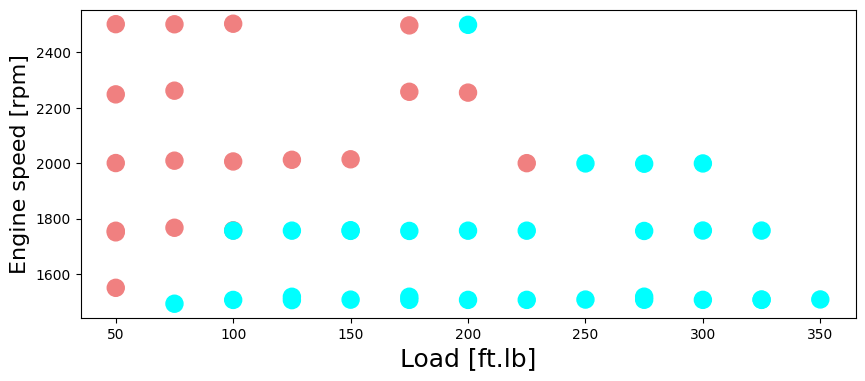

In [ ]:
colors = {0: 'lightcoral', 1:'aqua', 2:'green', 3:'coral', 4:'orange', 5:'black'}

area = 150
plt.figure(1, figsize=(10, 4))
plt.scatter(train['Load [ft.lb]'], train['Engine speed [rpm]'], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)
plt.xlabel('Load [ft.lb]', fontsize=18)
plt.ylabel('Engine speed [rpm]', fontsize=16)

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 0.1, X[0, :].max() + 0.1
    y_min, y_max = X[1, :].min() - 0.1, X[1, :].max() + 0.1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))



    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    area = 30
    plt.scatter(X[0,:], X[1,:], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)
    plt.xlabel('Load [ft.lb]', fontsize=12)
    plt.ylabel('Engine speed [rpm]', fontsize=12)

4

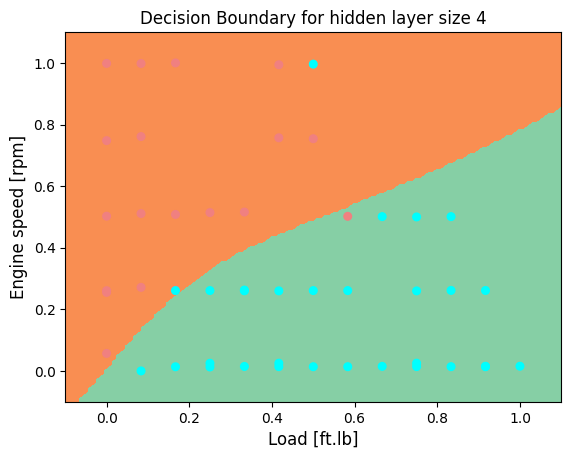

In [ ]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))
n_h

Accuracy for 1 hidden units: 91.83673469387756 %
Accuracy test for 1 hidden units: 92.3076923076923 %
Accuracy for 2 hidden units: 93.87755102040816 %
Accuracy test for 2 hidden units: 92.3076923076923 %
Accuracy for 3 hidden units: 93.87755102040816 %
Accuracy test for 3 hidden units: 92.3076923076923 %
Accuracy for 4 hidden units: 93.87755102040816 %
Accuracy test for 4 hidden units: 84.61538461538461 %
Accuracy for 5 hidden units: 93.87755102040816 %
Accuracy test for 5 hidden units: 84.61538461538461 %
Accuracy for 20 hidden units: 93.87755102040816 %
Accuracy test for 20 hidden units: 84.61538461538461 %
Accuracy for 50 hidden units: 93.87755102040816 %
Accuracy test for 50 hidden units: 76.92307692307693 %


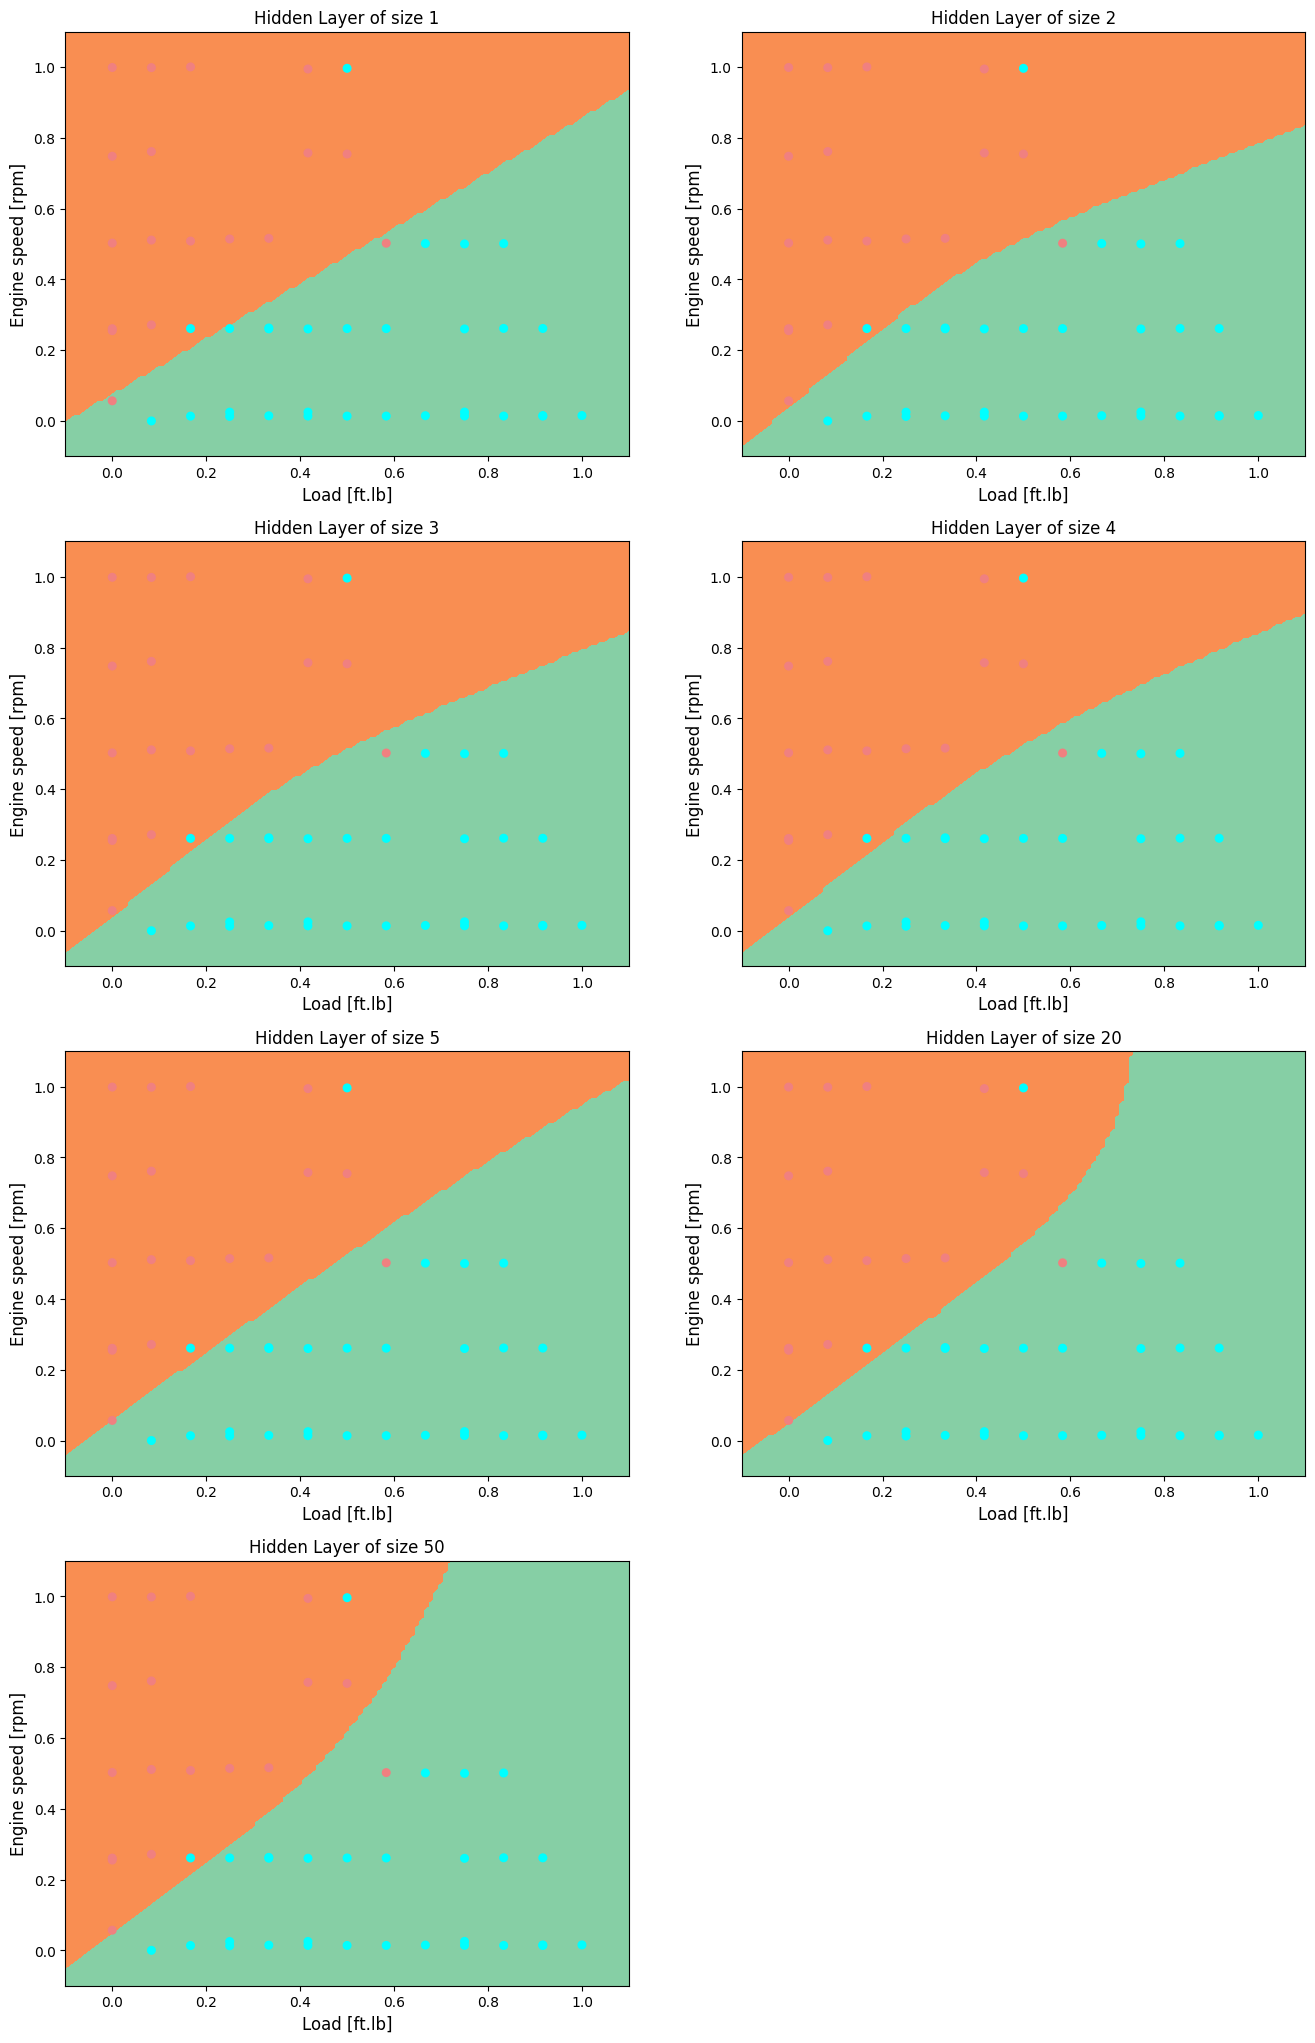

In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    predictions_test = predict(parameters, Xts)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    accuracy_test = float((np.dot(Yts,predictions_test.T) + np.dot(1-Yts,1-predictions_test.T))/float(Yts.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
    print ("Accuracy test for {} hidden units: {} %".format(n_h, accuracy_test))